# **Video Game Analysis and Visualization**

---

# Project Background

Using dataset from https://www.kaggle.com/gregorut/videogamesales
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com

# Project Objective

The objective is to understand the data and making analysis, aiming to explore as muchc as possible the data in a simple, intuitive and informative way. The data contains information from 1980 to 2020, but I will be using the data from 1980 to 2016 due to incomplete data in the years greater than 2016, in order to help me to do better analysis.

# Import Library and Reading Data

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Dataset

In [37]:
df = pd.read_csv('vgsales.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Dataset Content

- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game's release
- Year - Year of the game's release
- Genre - Genre of the game
- Publiser - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Preprocessing

## Missing Data

In [39]:
def missing_data():
    colunm_name = []
    missing = []
    percentage = []

    for i in df.columns:
        colunm_name.append(i)
        missing.append(df[i].isna().sum())
        percentage.append(round(df[i].isna().sum()/df.shape[0]*100, 2))
    
    return pd.DataFrame({
        'Column':colunm_name,
        'Missing':missing,
        'Percentage':percentage
    })

missing_data()

,Column,Missing,Percentage
0,Rank,0,0.00
1,Name,0,0.00
2,Platform,0,0.00
3,Year,271,1.63
4,Genre,0,0.00
5,Publisher,58,0.35
6,NA_Sales,0,0.00
7,EU_Sales,0,0.00
8,JP_Sales,0,0.00
9,Other_Sales,0,0.00


Because the dataset do not have much missing values, that means it is not losing much information. Therefore, I will drop NA values.

In [40]:
df.dropna(inplace=True)

## Drop year > 2016

In [41]:
df['Year'] = df['Year'].astype(int)

drop_row = df[df['Year'] > 2016].index
df = df.drop(drop_row)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Analysis

## Top 10 platform with most games sales

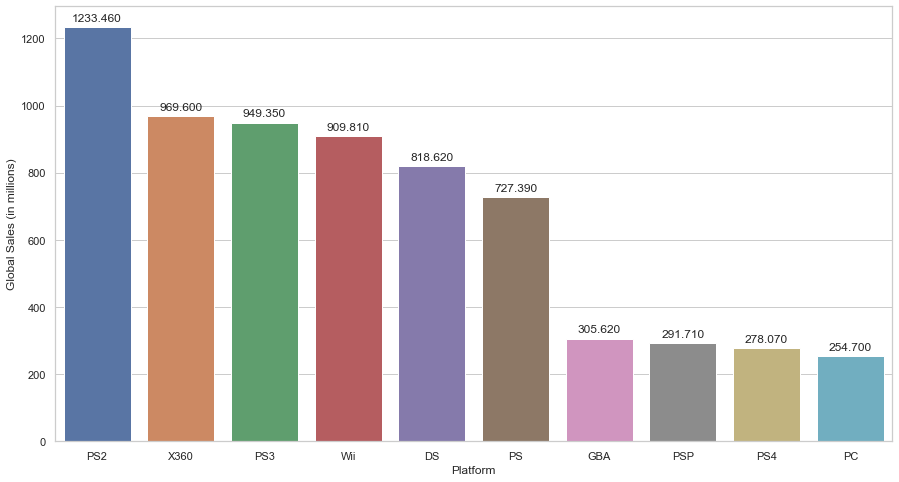

In [42]:
df_platform = df.groupby('Platform')['Global_Sales'].sum().reset_index()
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(x='Platform', y='Global_Sales', data=df_platform)
plt.ylabel('Global Sales (in millions)')
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Playstation 2 has the most sales. This is not surprising, Playstation 2 itself is a console that has affordalbe and reasonable price. Also, it seems people often prefer to play on consoles compared to PC because the experience to play on consoles are seamless and basically plug and ready to play, therefore they can avoid the huslte that they would had in PC.

## Video games sales comparison by platform in each regions

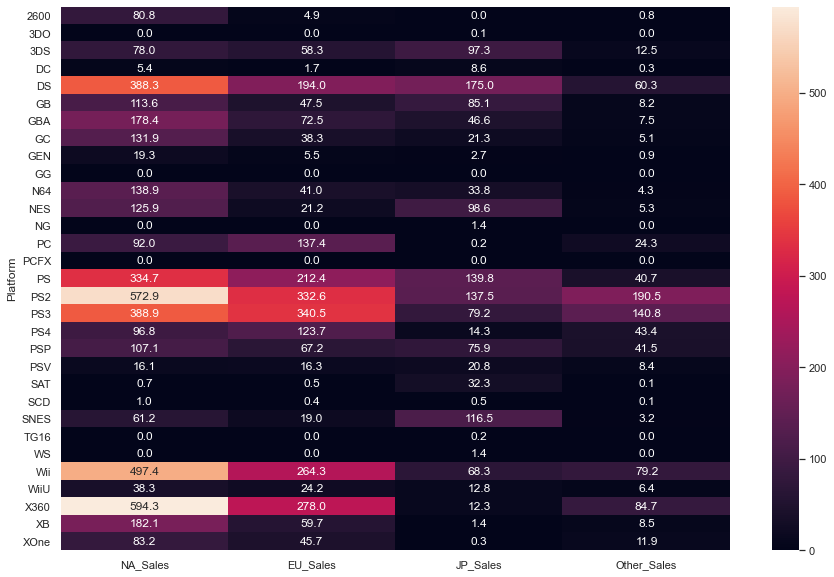

In [43]:
df_platform_comp = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
group_platform_comp = df_platform_comp.groupby('Platform').sum()

plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(group_platform_comp, annot=True, fmt='.1f')
plt.show()

As we already know, Playstation 2 have the most sales globally and also wins significantly in Japan region. But Xbox 360 have a lead in North Americe, whereas PC is still unpopular for gaming in every region, especially in Japan.

## How was the PS 2 sales?

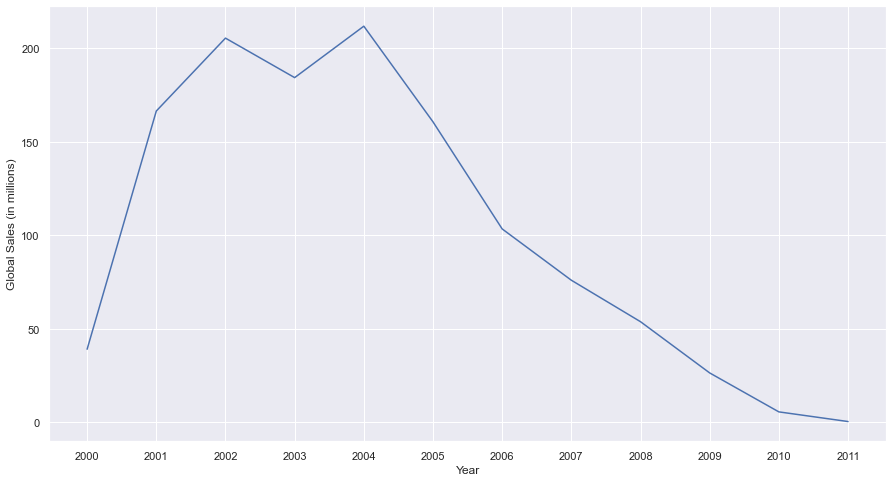

In [44]:
df_PS2_sales = df[df['Platform']=='PS2']
df_PS2_sales = df_PS2_sales.groupby('Year', as_index=False).sum()

plt.figure(figsize=(15,8))
sns.lineplot(x='Year', y='Global_Sales', data=df_PS2_sales)
year = df_PS2_sales['Year']
plt.ylabel('Global Sales (in millions)')
plt.xticks(year)
plt.show()

Playstation 2 was launched in March 2000 and the sales kept going until 2011, even when its brother, Playstation 3, was launched in November 2006. 

## Most created genre

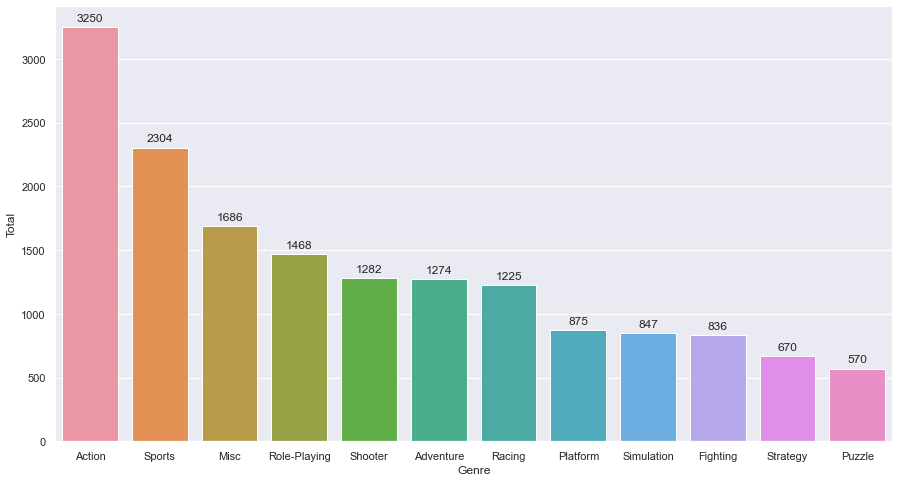

In [45]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.ylabel('Total')
for p in fig.patches:
    fig.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Most created genre is Action and followed by sport, as most of the people, including me, love action game. There are 3.250 action games, and 2.304 sports games have been made within the year 1980 to 2016.

## Genre with the most sales globally

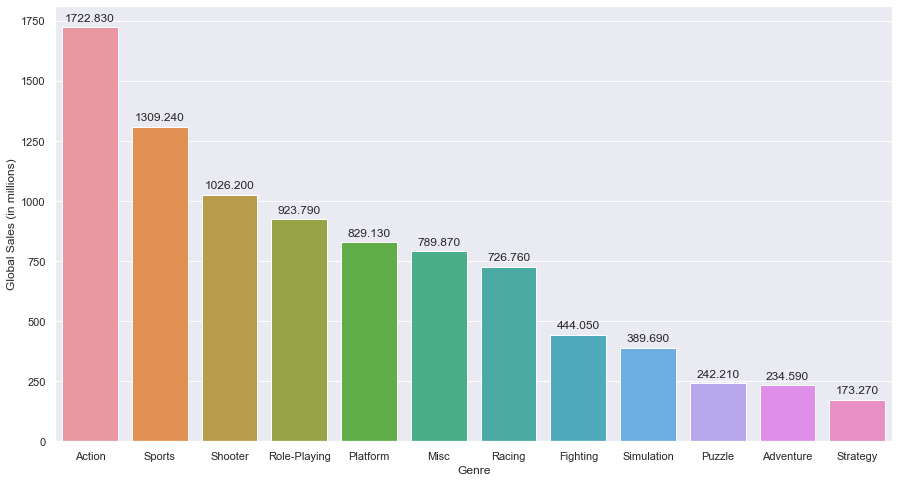

In [46]:
df_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()
df_genre = df_genre.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(15,8))
fig = sns.barplot(x='Genre', y='Global_Sales', data=df_genre)
plt.ylabel('Global Sales (in millions)')
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()


With action and sport with the most created genre, they are also genre with the most sales. 1.722 millions for action and 1.309 millions for sports.

## Video game sales comparison by genre in each regions

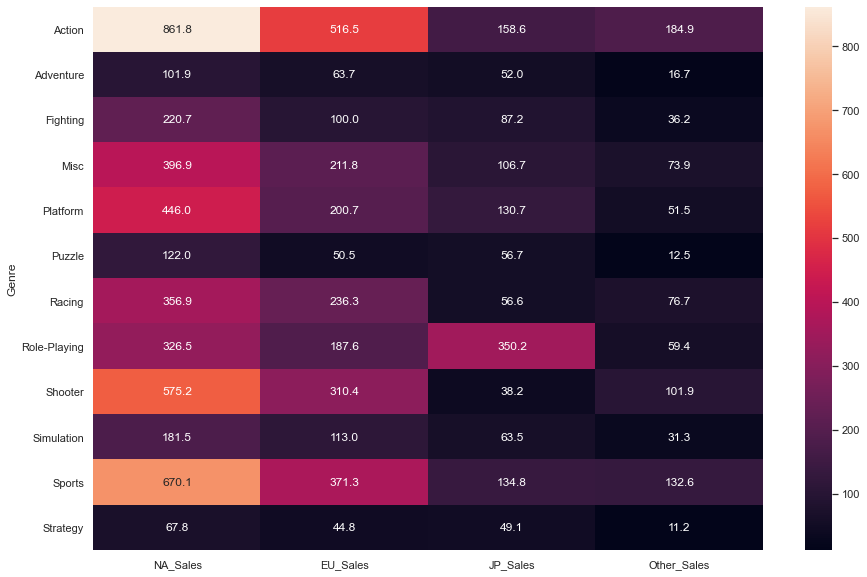

In [47]:
df_sales_comp = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
group_sales_comp = df_sales_comp.groupby('Genre').sum()

plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(group_sales_comp, annot=True, fmt='.1f')
plt.show()

North America, Europe, and other region prefer to play games with action genre, whereas Japan tend to play games with role-playing genre.

## Top 10 global sales by publisher

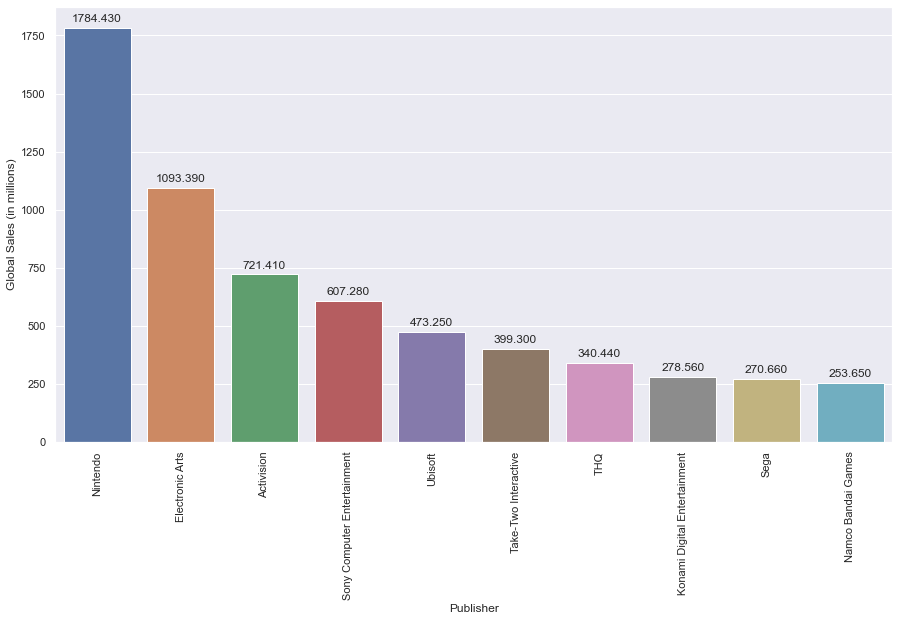

In [48]:
df_publish_sales = df[['Publisher','Global_Sales']]
group_publish_sales = df_publish_sales.groupby('Publisher', as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(x='Publisher', y='Global_Sales', data=group_publish_sales)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.ylabel('Global Sales (in millions)')
plt.show()



## Video games sales comparison by top 10 publisher in each region

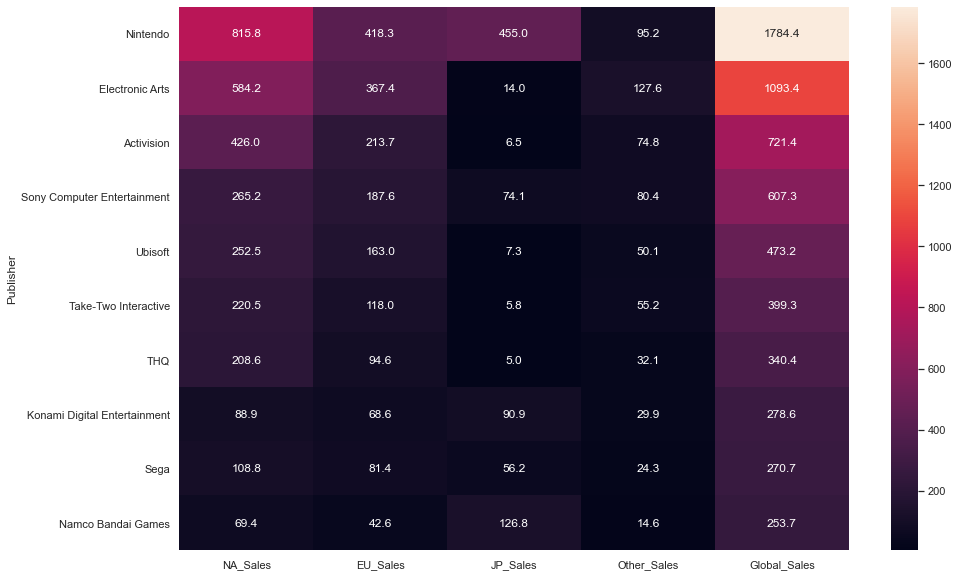

In [50]:
df_publish_comp = df[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
group_publish_comp = df_publish_comp.groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(group_publish_comp, annot=True, fmt='.1f')
plt.show()

On position 1, there is Nintendo. Nintendo is known for its role-playing, sports, and adventure games. Followed by Electronic Arts, who is known for action, adventure, shooter, and simulation games.

# Analysis Conclusion
  
In North America and Europe, mostly games genre's are action, sports and shooter from publisher such as Nintendo, Electronic Arts and also Activision, and gaming on neither Playstation or Xbox console. Whereas Japan more prefer role-playing games from Bintendo and Namco Bandai and gaming on Playstation, SNES or DS.

Console platform for gaming is more popular than PC, because its seamless, easy to use, do not require upgrades, affordable, and suitable for couch gaming with friends and family.  
But why does Playstation 2 was so popular and known as the best console? Playstation 2 was backwards compatible, meaning that it was able to play games from Playstation 1. Also Playstation 2 had much better graphic than its old ancestors. Not to mention there were many games that people love released on Playstation 2 such as Final Fantasy X, Simpsons Hit and Run, GTA III, Vice City and San Andreas. In short, Playstation 2 easily the best console fot the amount of great games it had, longevity and the technology it brought forward to its generation of gaming.